In [1]:
from src.simulation_module_GCE import run_simulation, plot_hist, weight, calc_eta
import src.algorithm as algo
import pantarei as rei
import numpy as np
import matplotlib.pyplot as plt

In [43]:
my_algo = algo.Algorithm()
sim = my_algo.simulation_GC

# Ts = [10,11,12,113]
# for T in Ts:
    # my_algo.run_simulation(temperature=T,volume=10,z=10,steps=200,clear_first=False,parallel=True,wait=True)

which_vals = {'energy': True, 'pressure': False, 'density': True, 'N': True}

steps = 2.5e5
volume = 8.735**3
T = 1.175
z = 0.0625

# steps = 2.5e4
# T = 1.18
# z = 0.063

Es,Ps,ds,Ns = [],[],[],[]

clear_first=False
# clear_first=True
wait=None
if wait is None: wait=clear_first
for s in [0,1,2,3]:
    data = run_simulation(function=sim,which_vals=which_vals,temperature=T,volume=volume,z=z,steps=steps,seed=s,
                        clear_first=clear_first,parallel=True,wait=wait)
    if not wait:
        print(data['acceptance']['accept_ratio'],data['tot_time'])
        if which_vals['energy']:    Es += data['energy']
        if which_vals['pressure']:  Ps += data['pressure']
        if which_vals['density']:   ds += data['density']
        if which_vals['N']:         Ns += data['N']



0.15731822831725958 3.1529051861585667e-05
0.16311442416201571 3.189448333828171e-05
0.17072385240804502 3.167843711678193e-05
0.16263788944046115 3.174034864233178e-05


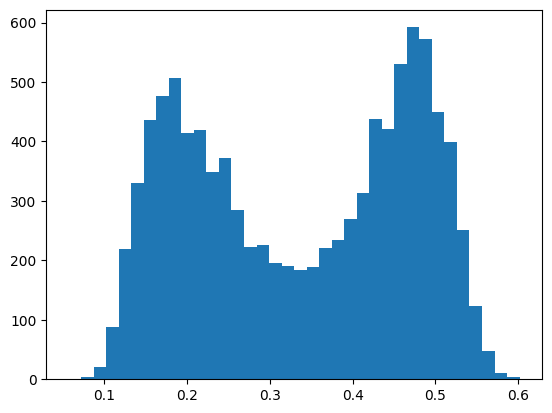

In [44]:
val = ds
bins = int((max(Ns)-min(Ns))/10)
p = plt.hist(val,bins)

In [14]:
# eta = np.zeros(1000)
# N_vals = [int(_) for _ in p[1]]
# N_freq = [_ for _ in p[0]]
# N_freq.append(0)
# eta[N_vals] = N_freq
# eta += 1e-10
# eta /= eta.sum()

# eta = np.log(eta)



In [50]:
p = np.zeros(1000)
for val in Ns:
    p[int(val)] += 1
p += 1e-10
p /= p.sum()

eta = 1./p

temp_eta_file = 'save_past/eta_save_inv.txt'
with open(temp_eta_file,'w') as f:
    for k in range(eta.shape[0]):
        f.write(f'{k:6}   {eta[k]}\n')

In [2]:
my_algo = algo.Algorithm()
sim = my_algo.simulation_GC

which_vals = {'energy': True, 'pressure': False, 'density': True, 'N': True}

steps = 2.5e4
volume = 8.735**3
T = 1.175
z = 0.0625
# z = 0.0635

# eta = calc_eta(Ns)

eta = []
temp_eta_file = 'save_past/eta_save_inv.txt'
with open(temp_eta_file,'r') as f:
    for line in f:
        val = line.split()[1]
        eta.append(float(val))
eta = np.array(eta)

# Es,Ps,ds,Ns = [],[],[],[]

clear_first=False
clear_first=True
wait=None
if wait is None: wait=clear_first

for s in [0,1,2,3]:
    data = run_simulation(function=sim,which_vals=which_vals,temperature=T,volume=volume,z=z,eta=eta,steps=steps,seed=s,
                        clear_first=clear_first,parallel=True,wait=wait)
    if not wait:
        print(data['acceptance']['accept_ratio'])
        if which_vals['energy']:    Es += data['energy']
        if which_vals['pressure']:  Ps += data['pressure']
        if which_vals['density']:   ds += data['density']
        if which_vals['N']:         Ns += data['N']



accepted: 0.89, 1.5, 1.0, 107
accepted: 0.0916, 1.5, 1.0, 107
accepted: 0.652, 1.6, 1.0, 107
accepted: 0.488, 1.3, 0.88, 106
accepted: 0.433, 1.3, 0.8, 105
accepted: 0.696, 1.7, 1.1, 104
accepted: 0.0306, 1.6, 1.1, 103
accepted: 0.029, 1.5, 1.0, 102
accepted: 0.233, 2.1, 1.4, 101
accepted: 0.416, 0.96, 0.62, 100
accepted: 0.1, 1.4, 0.97, 99
accepted: 0.626, 1.5, 1.0, 107
accepted: 0.259, 1.3, 0.88, 106accepted: 0.252, 1.3, 0.88, 106

accepted: 0.397, 1.2, 0.8, 105
accepted: 0.635, 1.7, 1.1, 104
accepted: 0.39, 1.6, 1.1, 103
accepted: 0.0428, 1.5, 1.0, 102
accepted: 0.473, 2.1, 1.4, 101
accepted: 0.714, 0.92, 0.62, 100
accepted: 0.728, 1.5, 0.97, 99
accepted: 0.918, 1.5, 1.0
accepted: 0.358, 1.5, 1.0, 107
accepted: 0.505, 1.4, 0.88, 106
accepted: 0.602, 1.2, 0.8, 105
accepted: 0.33, 1.7, 1.1, 104
accepted: 0.354, 1.0, 0.9
accepted: 0.443, 0.7, 1.1, 104
accepted: 0.0933, 1.7, 1.1, 103
accepted: 0.825, 1.6, 1.0, 102
accepted: 0.612, 2.1, 1.4, 101
accepted: 0.244, 0.88, 0.62, 100
accepted:

Process ForkProcess-4:
Process ForkProcess-14:
Process ForkProcess-16:
Process ForkProcess-3:
Process ForkProcess-15:
Process ForkProcess-2:
Process ForkProcess-8:
Traceback (most recent call last):
Process ForkProcess-6:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkProcess-11:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process ForkProcess-10:
Traceback (most recent call last):
Process ForkProcess-7:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Process ForkProcess-12:
  File "/usr/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.10/concurrent/futures/pro

In [ ]:
rei.report()

⭐ running 100% [4/4]
   ⭐ simulation_GC/793439fd4d8c2dd0225ddc019db1ad99 0:03:17 simulation_GC(kwargs={'which_vals': {'energy': True, 'pressure': False, 'density': True, 'N': Tr ...
   ⭐ simulation_GC/2daa4b2895c41bd5ca039c2d06455a20 0:03:17 simulation_GC(kwargs={'which_vals': {'energy': True, 'pressure': False, 'density': True, 'N': Tr ...
   ⭐ simulation_GC/f9c139a735627db10aaa8e8aa6221fdd 0:03:21 simulation_GC(kwargs={'which_vals': {'energy': True, 'pressure': False, 'density': True, 'N': Tr ...
   ⭐ simulation_GC/6ad54fb6b71c3fce4883e1f461c3a7f9 0:03:21 simulation_GC(kwargs={'which_vals': {'energy': True, 'pressure': False, 'density': True, 'N': Tr ...


Exception in thread Thread-4:
concurrent.futures.process._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/lib/python3.10/concurrent/futures/process.py", line 246, in _process_worker
    r = call_item.fn(*call_item.args, **call_item.kwargs)
  File "/home/marcofava/.local/lib/python3.10/site-packages/pantarei/task.py", line 167, in __call__
    results = self.func(**kwargs)
  File "/home/marcofava/compphys_examples/Simulazioni-Atomistiche-Molecolari/mc-GC/src/algorithm.py", line 79, in simulation_GC
    montecarlo.run()
  File "/home/marcofava/compphys_examples/Simulazioni-Atomistiche-Molecolari/mc-GC/src/MonteCarlo.py", line 51, in run
    self.step()
  File "/home/marcofava/compphys_examples/Simulazioni-Atomistiche-Molecolari/mc-GC/src/MonteCarlo.py", line 71, in step
    self.insertion_move()
  File "/home/marcofava/compphys_examples/Simulazioni-Atomistiche-Molecolari/mc-GC/src/MonteCarlo.py", line 146, in insertion_move
    print(f"accepted: {r:.3}, {p:.2}, {sel

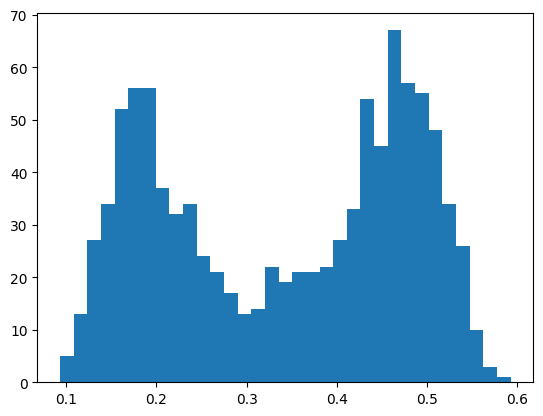

In [59]:
val = ds
bins = int((max(Ns)-min(Ns))/10)
p = plt.hist(val,bins)

In [2]:
rei.report()

In [3]:
my_algo = algo.Algorithm()
sim = my_algo.simulation_GC

which_vals = {'energy': True, 'pressure': False, 'density': True, 'N': True}

steps = 1
volume = 8.735**3
T = 1.175
z = 0.0625
# z = 0.0635

# eta = calc_eta(Ns)

eta = []
temp_eta_file = 'save_past/eta_save_inv.txt'
with open(temp_eta_file,'r') as f:
    for line in f:
        val = line.split()[1]
        eta.append(float(val))
eta = np.array(eta)

# Es,Ps,ds,Ns = [],[],[],[]

clear_first=False
clear_first=True
wait=None
if wait is None: wait=clear_first

data = run_simulation(function=sim,which_vals=which_vals,temperature=T,volume=volume,z=z,eta=eta,steps=steps,clear_first=clear_first,parallel=False,wait=wait)

accepted: 0.155, 1.5, 1.0
accepted: 0.224, 1.9, 1.0
accepted: 0.342, 1.5, 1.0
accepted: 0.734, 0.96, 1.0
accepted: 0.151, 3.2, 0.88
accepted: 0.626, 1.4, 1.3
accepted: 0.576, 1.6, 0.84
accepted: 0.546, 1.9, 1.2
accepted: 0.714, 1.2, 0.76
accepted: 0.875, 1.8, 1.1
accepted: 0.363, 2.8, 0.88
accepted: 0.275, 1.7, 1.1
accepted: 0.834, 2.9, 0.88
accepted: 0.747, 1.6, 1.1
accepted: 0.326, 1.6, 1.0
accepted: 0.651, 1.4, 0.88
accepted: 0.991, 2.4, 1.1
accepted: 0.764, 2.4, 1.0
accepted: 0.265, 1.3, 1.0
accepted: 0.618, 1.1, 0.88
accepted: 0.766, 4.4, 1.1
accepted: 0.466, 1.2, 0.88
accepted: 0.77, 0.81, 1.1
accepted: 0.106, 1.4, 0.88
accepted: 0.626, 1.2, 0.8
accepted: 0.327, 1.1, 1.1
accepted: 0.156, 2.5, 0.9
accepted: 0.276, 0.78, 1.1
accepted: 0.252, 2.1, 0.9
accepted: 0.34, 1.9, 1.1
accepted: 0.574, 1.5, 1.1
accepted: 0.287, 1.3, 1.0
accepted: 0.592, 2.4, 1.4
accepted: 0.581, 3.9, 0.72
accepted: 0.153, 2.4, 1.4
accepted: 0.0804, 2.1, 0.72
accepted: 0.586, 1.2, 1.4
accepted: 0.25, 1.4, 0.62

ZeroDivisionError: integer division or modulo by zero

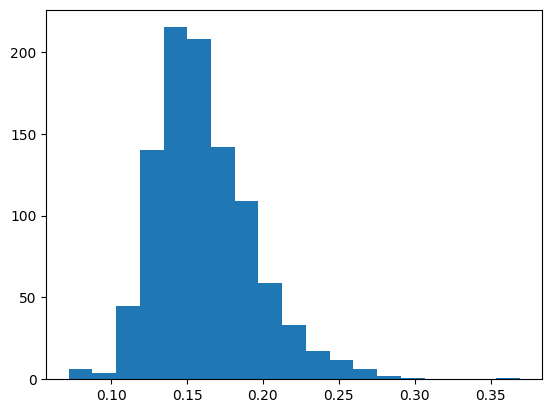

In [9]:
w = weight(1,1,1,1,Es,eta)


import matplotlib.pyplot as plt
val = [ds[k]*np.exp(eta[Ns[k]]) for k in range(len(Ns))]
val = ds
bins = int((max(Ns)-min(Ns))/10)
p = plt.hist(val,bins)

# p = np.zeros(1000)
# for val in Ns:
#     p[int(val)] += 1

# val = p
# val = [p[k]*np.exp(eta[Ns[k]]) for k in range(len(p))]
# edg = np.array([k for k in range(len(p)+1)])
# plt.stairs(val,edg,fill=True)